In [404]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"packages"))
print os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import getimage
import geocoder
import reverse_geocoder as rg # Offline geocoder
import conversion
import improcess
import pandas as pd
reload(getimage)
reload(improcess)

/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE143/Project/night-flare-Shijia


<module 'improcess' from '/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE143/Project/night-flare-Shijia/packages/improcess.pyc'>

Demo for `get_image()`

(512, 512)


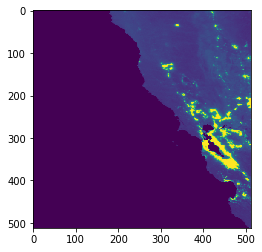

In [164]:
im = getimage.get_image(tileMatrix=6, tileCol=12, tileRow=11, date="2017-10-10") #Oregon Area
im = np.array(im)
print (im.shape)
plt.imshow(im)

### How to Decode Geographic Location Information
[reverse-geocoder Documentaion](https://github.com/thampiman/reverse-geocoder) (Offline Geodecoder)

```python
import reverse_geocoder as rg

coordinates = (32.874,-117.223)#, (32.765370, -117.023632)#,(9.936033, 76.259952),(37.38605,-122.08385)
results = rg.search(coordinates)
print results[0]```

[Geocoder Documentation](http://geocoder.readthedocs.io/api.html#install)


```python
import geocoder
geocoder.google("453 Booth Street, Ottawa ON").housenumber```




[google-maps-services-python](https://github.com/googlemaps/google-maps-services-python)

Explanation on the parameters:

* tileMatrix: Zoomed in level
* tileCol: Column index in the map tiles
* tileRow: Row index in the map tiles

### Analysis on the top-10 most light polluted counties in California

To show the Light Pollution Map by providing the latitude and longtitude

In [330]:
reload(improcess)
# To obtain the whole california state light pollution map (After Image Processing) in April, 2018.
# Might take 15s to run
tileMatrix = 6
latitude, longtitude = (41.802756, -123.979162) # Top Left Conner of the Califonia Region
tileRow, tileCol = conversion.get_tile_info(latitude=41.802756, longtitude=-123.979162, tileMatrix=6)
print('tileRow = {}, tileCol = {}, tileMatrix = {}'.format(tileRow, tileCol, tileMatrix))
im, mask = improcess.get_california_image(tileMatrix=6, tileCol=12, tileRow=10, start_date="2018-04-01", num_days=31)

tileRow = 10, tileCol = 12, tileMatrix = 6


Display The Light Pollution Map and The Mask for Land

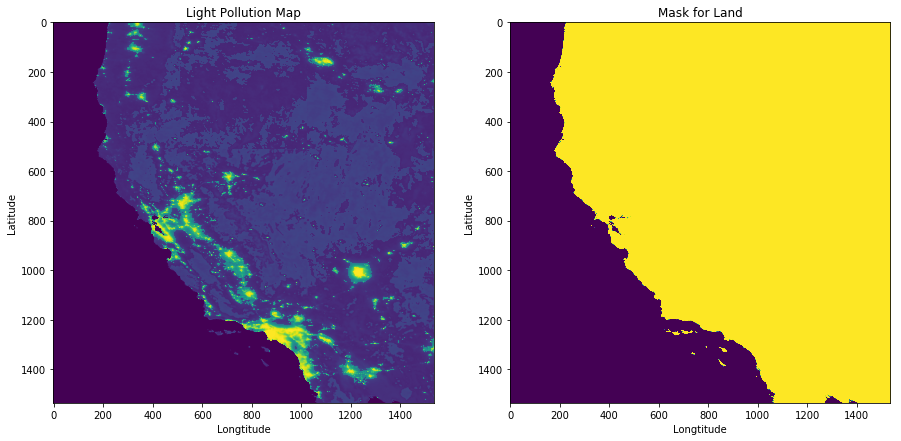

In [342]:
plt.figure(figsize=(15,15))

plt.figure(1)
plt.subplot(121)
plt.imshow(im)
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Light Pollution Map')

plt.subplot(122)
plt.imshow(mask)
    
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Mask for Land')
plt.savefig('201804_pollution_mask.png')
plt.show()

To perform geodecoding on the light pollution map and convert the results to pandas DataFrame for analysis

In [349]:
%%time
# Takes 30s to run
reload(conversion)
df_cali = conversion.geodecode_region(tileMatrix, tileCol, tileRow, im, mask, state='California')
print "The total pixel locations in California, US: ", df_cali['Light Pollution'].count()
display(df_cali.head(n=5))
#results.to_csv('tmp_list.csv', sep=',')

The total pixel locations in California, US:  523944


,Light Pollution,Region,County,State,Country,Region Coordinate,Latitude,Longtitude
0,29.003405,Tulelake,Siskiyou County,California,US,"(41.95599, -121.47749)",42.662109,-121.042969
1,29.092760,Tulelake,Siskiyou County,California,US,"(41.95599, -121.47749)",42.662109,-121.034180
2,29.165256,Tulelake,Siskiyou County,California,US,"(41.95599, -121.47749)",42.653320,-121.051758
3,29.221736,Tulelake,Siskiyou County,California,US,"(41.95599, -121.47749)",42.653320,-121.042969
4,29.308562,Tulelake,Siskiyou County,California,US,"(41.95599, -121.47749)",42.653320,-121.034180


CPU times: user 22.7 s, sys: 606 ms, total: 23.3 s
Wall time: 27.1 s


In [362]:
stats = df_cali['Light Pollution'].groupby(df_cali['County']).describe()
stats.sort_values(by=['mean'], ascending=False, inplace=True)
stats['Total Light Pollution Count'] = stats['count'] * stats['mean']
stats

,count,mean,std,min,25%,50%,75%,max,Total Light Pollution Count
County,,,,,,,,,
Orange County,2936.0,205.648395,50.778071,3.554661,174.947587,223.870721,246.248536,254.964800,6.037837e+05
San Francisco County,124.0,205.188165,76.345777,3.797702,212.770450,244.199057,249.174224,253.686009,2.544333e+04
Alameda County,2173.0,174.430659,60.379502,2.613191,141.730376,182.172163,226.953315,252.676775,3.790378e+05
Contra Costa County,3458.0,149.834148,50.334389,3.287353,114.206569,152.650223,187.293386,246.164325,5.181265e+05
Sacramento County,3859.0,148.457490,68.173996,37.503221,106.709938,142.534718,218.707853,253.826859,5.728975e+05
Los Angeles County,12617.0,145.907326,85.742206,4.238661,46.032294,147.317081,237.797154,255.000000,1.840913e+06
San Mateo County,1775.0,131.882457,72.650857,3.086670,47.302232,136.414487,198.082343,251.351896,2.340914e+05
San Joaquin County,5121.0,129.976434,56.918223,23.491479,106.669175,134.278900,164.075541,247.376557,6.656093e+05
Santa Clara County,4300.0,118.665066,78.031583,22.746468,40.449388,113.280935,189.308263,252.292800,5.102598e+05


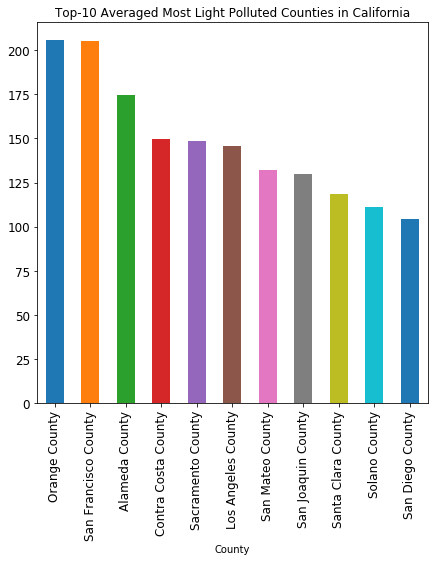

In [363]:
cali_mean = df_cali.groupby(['County'])['Light Pollution'].mean()
cali_mean.sort_values(ascending=False).head(n=11).plot(kind='bar', 
                                                       title='Top-10 Averaged Most Light Polluted Counties in California',
                                                       figsize=(7,7), fontsize=12)

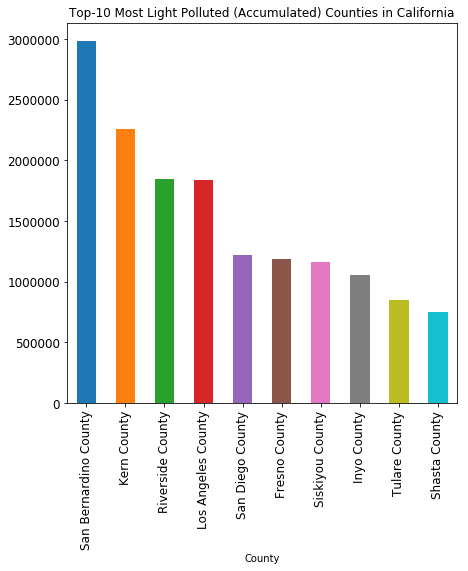

In [373]:
cali_total = stats['Total Light Pollution Count'].sort_values(ascending=False).head(10)
cali_total.plot(kind='bar', 
                title='Top-10 Most Light Polluted (Accumulated) Counties in California',
                figsize=(7,7), fontsize=12)

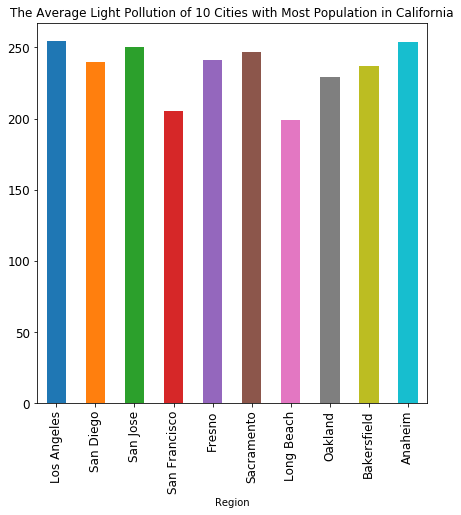

In [402]:
cali_region_mean = df_cali.groupby(['Region'])['Light Pollution'].mean().sort_values(ascending=False)
city_list = ['Los Angeles', 'San Diego','San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach',
            'Oakland', 'Bakersfield', 'Anaheim']
cali_region_mean.loc[city_list].plot(kind='bar', 
                                     title='The Average Light Pollution of 10 Cities with Most Population in California',
                                     figsize=(7,7), fontsize=12)

### Analysis of Monthly Average Light Pollution Trend for Major Cities in California

In [615]:
reload(conversion)
reload(getimage)
num_months = 12
month = 1
year = 2017
city_list = ['Los Angeles', 'San Diego','San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach',
            'Oakland', 'Bakersfield', 'Anaheim']
df = pd.DataFrame()
tileMatrix=6
tileCol=12
tileRow=10
for n in range(num_months):
    start_date = "{0}-{1:02d}-01".format(year, month)
    im, mask = improcess.get_california_image(tileMatrix=6, tileCol=12, tileRow=10, start_date=start_date, num_days=30)
    df_tmp = conversion.geodecode_region(tileMatrix, tileCol, tileRow, im, mask, city=city_list)
    series_mean = df_tmp.groupby(['Region'])['Light Pollution'].mean()
    df_mean = series_mean.reset_index()
    df_mean['Time'] = "{0}-{1:02d}".format(year, month)
    df = df.append(df_mean)
    print start_date, "Finished."
    #print df_mean
    if month == 12:
        month = 1
        year += 1
    else:
        month += 1
    

          Region  Light Pollution        Time
0        Anaheim       250.643724  2017-01-01
1    Bakersfield       233.506674  2017-01-01
2         Fresno       238.699794  2017-01-01
3     Long Beach       197.012690  2017-01-01
4    Los Angeles       253.538619  2017-01-01
5        Oakland       229.085832  2017-01-01
6     Sacramento       241.764095  2017-01-01
7      San Diego       229.565300  2017-01-01
8  San Francisco       204.594530  2017-01-01
9       San Jose       249.197927  2017-01-01
          Region  Light Pollution        Time
0        Anaheim       251.659166  2017-02-01
1    Bakersfield       234.171755  2017-02-01
2         Fresno       238.257960  2017-02-01
3     Long Beach       197.923291  2017-02-01
4    Los Angeles       252.295367  2017-02-01
5        Oakland       228.618597  2017-02-01
6     Sacramento       241.448681  2017-02-01
7      San Diego       237.918309  2017-02-01
8  San Francisco       205.431524  2017-02-01
9       San Jose       249.764823 

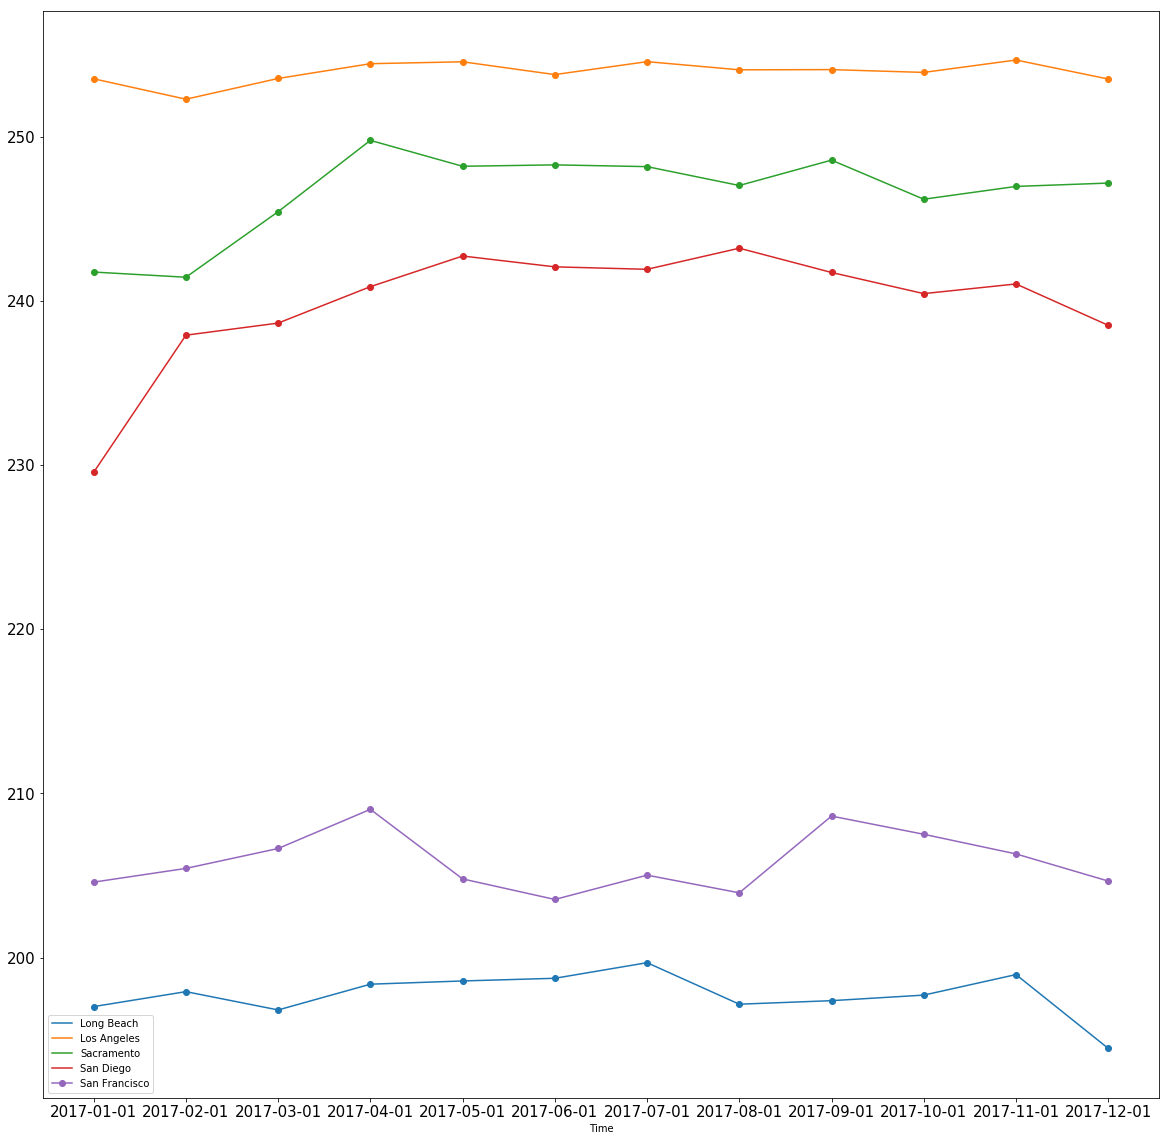

In [645]:
start_date = "{0}-{1:02d}-01".format(year, 12)
grouped = df.groupby(['Region'])

fig, ax = plt.subplots()
for name, group in grouped:
    if name in ['Los Angeles', 'San Diego','San Francisco', 'Sacramento', 'Long Beach']:
        tmp = group.rename(columns={'Light Pollution': name})
        tmp = tmp.groupby('Time').first()[name]
        tmp.plot(ax=ax, figsize=(20,20), fontsize=15, legend=True, kind='line', marker='o')
        ax.set_xticks(range(num_months))
        #print group.groupby('Time').first()['Light Pollution']
    

Analysis:

* Top 10 most light polluted counties.
* The temporal trend of the average light pollution in California
* Mark the average light pollution on the map
* Correlation between the population and light pollution level (heatmap)

In [ ]:
region_map = []
loc_dict = dict()
cnt = 0
color = range(256)
for loc in results:
    if loc['name'] not in loc_dict:
        cnt += 1
        loc_dict[loc['name']] = np.random.choice(color)
    region_map.append(loc_dict[loc['name']])
    loc_dict[loc['name']] += 1

In [ ]:
region_map = np.array(region_map).reshape(512,512)

In [ ]:
%matplotlib tk
fig1, ax1 = plt.subplots()
plt.imshow(region_map[:350, 400:], cmap='gray')
print region_map[:350, 400:]

In [ ]:
fig2, ax2 = plt.subplots()
plt.imshow(im[:350,400:])
region_map[450:, 450:]

In [ ]:
getimage.__file__

In [ ]:
!ls

In [ ]:
!cat getimage.py

In [118]:

import reverse_geocoder as rg

coordinates = (32.94140625, -114.741210938)#, (32.765370, -117.023632)#,(9.936033, 76.259952),(37.38605,-122.08385)
results = rg.search(coordinates)
print results[0]

{'name': 'Los Algodones', 'cc': 'MX', 'lon': '-114.73333', 'admin1': 'Baja California', 'admin2': '', 'lat': '32.7'}


tileMatrix = 6
tileRow = 12 tileCol = 12
(512, 1024)


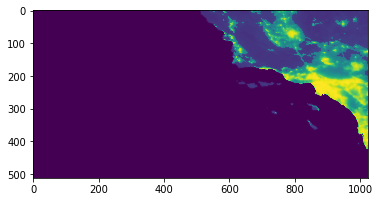

In [277]:
tileMatrix = 6
#latitude, longtitude = (34.031598, -118.229542) # Los Angeles
latitude, longtitude = (32.874673, -117.222538) # La Jolla
#latitude, longtitude = (39.881664, 116.426270) # Beijing

tileRow, tileCol = conversion.get_tile_info(latitude, longtitude, tileMatrix)
date = "2017-10-31"
#print getimage._build_url(tileMatrix, tileCol, tileRow, date)
tileRow = tileRow
tileCol = tileCol-1
print "tileMatrix =", tileMatrix
print "tileRow =",tileRow, "tileCol =", tileCol
im1 = improcess.get_processed_image(tileMatrix=tileMatrix, tileCol=tileCol, tileRow=tileRow, start_date="2017-10-01")
im2 = improcess.get_processed_image(tileMatrix=tileMatrix, tileCol=tileCol+1, tileRow=tileRow, start_date="2017-10-01")
im = np.concatenate((im1, im2), axis=1)
#im = np.array(im1)
print (im.shape)
plt.imshow(im)
mask = getimage.get_mask(tileMatrix=tileMatrix, tileCol=tileCol, tileRow=tileRow)
mask2 = getimage.get_mask(tileMatrix=tileMatrix, tileCol=tileCol+1, tileRow=tileRow)
mask = np.concatenate((np.array(mask), np.array(mask2)), axis = 1)

In [ ]:
im = improcess.get_processed_image(tileMatrix=5, tileCol=7, tileRow=5)
im2 = improcess.get_processed_image(tileMatrix=5, tileCol=6, tileRow=5)
plt.imshow(np.concatenate((np.array(im2), np.array(im)), axis = 1))

In [ ]:
mask = getimage.get_mask(tileMatrix=5, tileCol=6, tileRow=5)
mask
plt.imshow(mask)

In [313]:
# Method To reset the index
mean = stats['mean'].to_frame()
tmp = pd.merge(results_US, mean, on='County', how='right')
tmp1 = tmp[tmp['State'] == 'California'].groupby('County').first()
tmp1.reset_index(inplace=True)  
tmp1

,County,Light Pollution,Region,State,Country,Region Coordinate,Latitude,Longtitude,mean
0,Los Angeles County,37.013808,Green Valley,California,US,"(34.62165, -118.41397)",34.875000,-118.458984,145.907326
1,San Diego County,114.048000,Fallbrook,California,US,"(33.37642, -117.25115)",33.477539,-117.342773,104.339460
2,San Francisco County,34.434795,San Francisco,California,US,"(37.77493, -122.41942)",37.845703,-122.378906,205.188165
